In [1]:
import pyroot_module as pr

Welcome to JupyROOT 6.19/01
Delphes classes imported


### Importing signal and background to create `Data` objects for a Delphes tree

In [2]:
signal_path = "/home/daniel/VBF/data/signal/daniel_run_05.root"
background_path = "/home/daniel/VBF/data/background/santiago_run_04.root"

signal = pr.Data(signal_path, "signal")
background = pr.Data(background_path, "background")

we can see the number of events with the `number_of_events` attribute

In [3]:
ns = signal.number_of_events
nb = background.number_of_events

print "signal number of events: ",ns
print "background number of events: ",nb

signal number of events:  50000
background number of events:  48974


### Creating and filling histograms 

We can see the histograms than can be created using the `DisplayHistograms` method on some Data class instance

In [4]:
signal.DisplayHistograms()

hPT[j]: Transverse momentum
hEta[j]: jets pseudorapidity
hDeltaEta[j]: Difference on pseudorapidity between MET and jets
hDeltaPhiMetJet[j]: Difference on the azimuthal angle between the Met and jets
hDeltaPhi: Difference on the azimuthal angle between the two leading jets
hMass: Invariant mass for the two leading jets
hPTdiv: Ratio between the transverse momentum of the two leading jets
hMetET: MET transverse energy
hMetPhi: Azimuthal angle of the MET
hDeltaEtaJet: Difference on pseudorapidity between the two leading jets
hDeltaPhiMax: Difference on the azimuthal angle between the two jets with greatest invariant mass
hMassMax: Invariant mass for the jets with greatest invariant mass
hPTdivMax: Ratio between the transverse momentum of the jets with greatest invariant mass
hDeltaEtaJetMax: Difference on pseudorapidity between the jets with greatest invariant mass


We can see/change some histogram features through the `<histName>_feature` attribute, which contains the number of bins, lower and upper limits, respectively  

In [5]:
print "hMass number of bins: ",signal.hPT_feature[0]
print "hMass lower limit: ",signal.hPT_feature[1]
print "hMass upper limit: ",signal.hPT_feature[2]

hMass number of bins:  100
hMass lower limit:  0.0
hMass upper limit:  1800


Let's initialize the histograms for the signal and background data 

In [6]:
signal.Histograms()
background.Histograms()

Before filling the histograms, we must call the `GetObjects()` method to get well-defined jet and met objects. 

In [8]:
sig_obj = signal.GetObjects()
bac_obj = background.GetObjects()

By default, the method `Fill()`filters jets with $P_T > 30 \: \text{GeV}$ and $|\eta| < 5$. Additionally, it filters events with at least two jets in opposite hemispheres.

In [9]:
signal.Fill(*sig_obj)
background.Fill(*bac_obj)

To visualize some histogram, we can use the `PlotHistogram()` method. By default, it will create a folder named `Histograms` in the current directory and save the plot there. To change this path use the kwarg `savePath`.

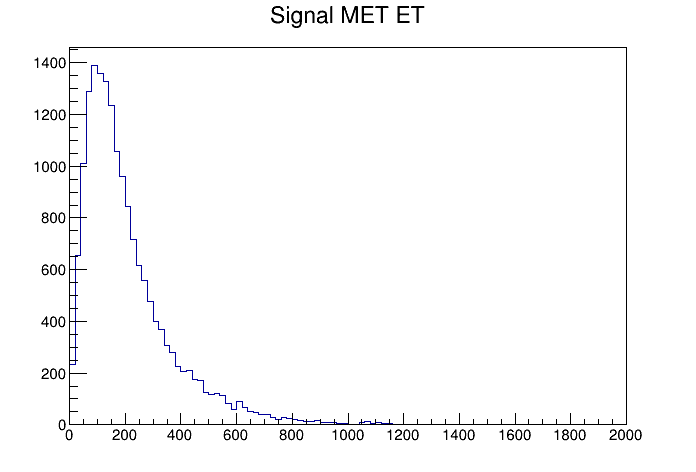

In [10]:
# plotting the MET transverse energy for the signal data
pr.PlotHisto(signal.hMetET, title="Signal MET ET", save=False)

Alternative, we can plot two histograms in the same canvas using the `PlotHistograms()` method:

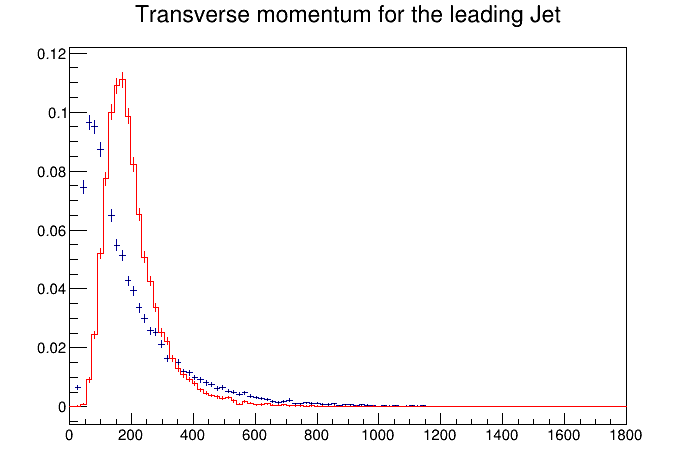

In [11]:
# plotting the tranverse momentum for the leading jets in signal and background data
hs = signal.hPT[0]
hb = background.hPT[0]

pr.PlotHistos(hs, hb, save=False, title="Transverse momentum for the leading Jet")

we can obtain a significance histogram made out of hs and hb using the `Significance` method:

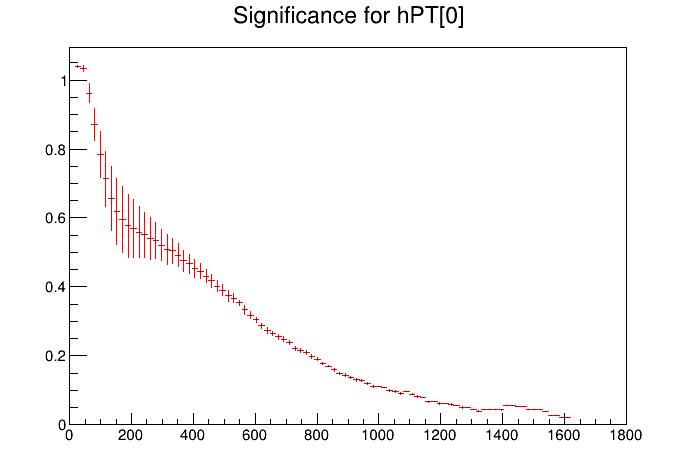

In [12]:
hz = pr.Significance(hs, hb, ns=ns, nb=nb)

pr.PlotHisto(hz, title="Significance for hPT[0]" ,save=False)

### Applying cuts

The number of events that pass some cut are store in the `cuts` attribute (there is a latex-like string of the cuts in the `cuts_keys` attribute): 

In [13]:
# number of signal events that pass some cut (only default cuts)
signal.cuts

{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 0,
 'cut7': 0}

we can activate/deactivate an individual cut or modify its value

In [14]:
signal.Fill(*sig_obj, h_cut=True, h_cut_value=500)
background.Fill(*bac_obj, h_cut=True, h_cut_value=500)

In [15]:
# number of signal events that pass some cut (with an additional cut)
signal.cuts

{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 0,
 'cut4': 0,
 'cut5': 0,
 'cut6': 3610,
 'cut7': 0}

To apply all the cuts at once we can set the `apply_cut` (`False` by default) attribute to `True` before calling the `Fill` method:

In [16]:
pr.Data.apply_cut = True

signal.Fill(*sig_obj)
background.Fill(*bac_obj)

In [17]:
# number of signal events that pass some cut (all cuts)
signal.cuts

{'cut0': 50000L,
 'cut1': 39474,
 'cut2': 17312,
 'cut3': 1541,
 'cut4': 351,
 'cut5': 118,
 'cut6': 116,
 'cut7': 34}

We can see the cutflow with the `CutFlow` function:

In [18]:
t1, t2 = pr.CutFlow(signal.cuts, background.cuts, signal.cuts_keys, ns=ns, nb=nb)

In [19]:
t1

,${\textbf{[bold]: GeV}}$,S,B,Z
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",50000.0,48974.0,234.415327
cut1,Number of jets $\geq$ 2,39474.0,38487.0,208.686058
cut2,$\eta (j_1) * \eta (j_2) < 0$,17312.0,16125.0,140.868625
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",1541.0,1514.0,41.100243
cut4,"$\mathbf{M(j_1,j_2) >}1000$",351.0,463.0,17.283618
cut5,$\mathbf{MET >}200$,118.0,195.0,9.067169
cut6,$\mathbf{H_t >}200$,116.0,194.0,8.941813
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",34.0,42.0,5.535512


In [20]:
t2

,${\textbf{[bold]: GeV}}$,s_c,s_r,b_a,b_r
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",1,1,1,1
cut1,Number of jets $\geq$ 2,0.78948,0.78948,0.785866,0.785866
cut2,$\eta (j_1) * \eta (j_2) < 0$,0.34624,0.438567,0.329256,0.418973
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",0.03082,0.0890134,0.0309144,0.0938915
cut4,"$\mathbf{M(j_1,j_2) >}1000$",0.00702,0.227774,0.009454,0.305812
cut5,$\mathbf{MET >}200$,0.00236,0.336182,0.0039817,0.421166
cut6,$\mathbf{H_t >}200$,0.00232,0.983051,0.00396129,0.994872
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",0.00068,0.293103,0.000857598,0.216495


To create a `Data` object for a `vbf_udea_tree`, first we have to convert the signal and background data with the `Convert` method. We just need to pass the new data name: 

In [ ]:
signal.Convert("signal_data.root")
background.Convert("background_data.root")

Then, the analysis is the same

In [23]:
s_path = "/home/daniel/VBF/scripts/signal_data.root"
b_path = "/home/daniel/VBF/scripts/background_data.root"

# we need to pass the tree name (default is "Delphes")
s = pr.Data(s_path, "s", "vbf_udea_tree")
b = pr.Data(b_path, "b", "vbf_udea_tree")

s.Histograms()
b.Histograms()

s_obj = s.GetObjects()
b_obj = b.GetObjects()

s.Fill(*s_obj)
b.Fill(*b_obj)

In [24]:
t11, t22 = pr.CutFlow(s.cuts, b.cuts, s.cuts_keys, ns=ns, nb=nb)

In [25]:
t11

,${\textbf{[bold]: GeV}}$,S,B,Z
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",50000.0,48974.0,234.415327
cut1,Number of jets $\geq$ 2,39150.0,38296.0,207.542949
cut2,$\eta (j_1) * \eta (j_2) < 0$,17078.0,15972.0,139.675886
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",1556.0,1515.0,41.456676
cut4,"$\mathbf{M(j_1,j_2) >}1000$",345.0,466.0,16.957985
cut5,$\mathbf{MET >}200$,116.0,201.0,8.800095
cut6,$\mathbf{H_t >}200$,113.0,198.0,8.641862
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",27.0,42.0,4.456351


In [26]:
t22

,${\textbf{[bold]: GeV}}$,s_c,s_r,b_a,b_r
cut0,"${\mathbf{P_T>30}}$, $|\eta(j)|<5$",1,1,1,1
cut1,Number of jets $\geq$ 2,0.783,0.783,0.781966,0.781966
cut2,$\eta (j_1) * \eta (j_2) < 0$,0.34156,0.43622,0.326132,0.417067
cut3,"$|\Delta \eta (j_1,j_2)| > 4$",0.03112,0.0911114,0.0309348,0.0948535
cut4,"$\mathbf{M(j_1,j_2) >}1000$",0.0069,0.221722,0.00951525,0.307591
cut5,$\mathbf{MET >}200$,0.00232,0.336232,0.00410422,0.43133
cut6,$\mathbf{H_t >}200$,0.00226,0.974138,0.00404296,0.985075
cut7,"|$\Delta\phi(\text{MET},j)| > 0.5$",0.00054,0.238938,0.000857598,0.212121
